# EXPLORATORY DATA ANALYSIS: Most Streamed Spotify Songs 2023
#### _Magracia, Marc Reggie Sean S._ | _2ECE-C_

_This notebook contains an exploratory data analysis (EDA) on a dataset containing information about popular tracks on Most Streamed Spotify Songs 2023. The dataset is given in a csv file, "spotify-2023.csv", and will be imported into the notebook. This task aims to analyze, visualize, and interpret the data to extract meaningful insights._

### | Program:

_____
### INITIALIZATION

In [1]:
# Import libraries to be used (Pandas, Matplotlib, Seaborn)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

________
### STEP 1
_Familiarizing the structure of the dataset. Check for missing values and data types, and perform an initial exploration to understand the different features available._

In [2]:
# Dataset
# Load the dataset with a specific encoding to handle special characters
spotify_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
1,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,721975598,119,...,122,D,Minor,78,50,63,27,0,9,5
2,PRC,"Natanael Cano, Peso Pluma",2,2023,1,23,961,26,436027885,19,...,138,G,Minor,78,89,83,10,0,12,5
3,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
4,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812,52,...,204,F#,Major,52,52,68,46,0,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Santa Tell Me,Ariana Grande,1,2013,12,13,9408,0,834129063,231,...,133,G,Major,46,53,63,5,0,30,18
949,When I Was Your Man,Bruno Mars,1,2012,12,5,2420,11,1661187319,0,...,145,NaN,Major,60,43,27,94,0,14,4
950,Locked Out Of Heaven,Bruno Mars,1,2012,12,5,1622,9,1481349984,0,...,144,F,Major,73,87,70,6,0,28,5
951,California Love - Original Version (Explicit),"Dr. Dre, 2Pac, Roger",3,1995,12,28,18773,0,579395142,128,...,92,G,Major,77,76,84,3,0,38,4


In [3]:
# Analyzing the dataset
# Display the dataset's shape and data types
print("Dataset Shape: ", spotify_data.shape)
print("\nData Types:\n",spotify_data.dtypes)

Dataset Shape:  (953, 24)

Data Types:
 track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


In [4]:
# Identify missing values in the dataset
miss_v =  spotify_data.isnull().sum()
# Convert the list into dataset
miss_v_ds = miss_v[miss_v > 0].reset_index()
miss_v_ds.columns = ["Category" , "Missing Value/s"]
print("\nMissing Values:\n")
miss_v_ds


Missing Values:



,Category,Missing Value/s
0,in_shazam_charts,50
1,key,95


#### Overview of Dataset:

* ##### Initial Exploration:
    * _The dataset has 953 rows containing unique values of observation and 24 columns of each of the observations' categories/traits/attributes._ 

* ##### Dataset Features:
    * _Containing 24 columns, the dataset has three distinct data types which are:_
        * Integer (int): The most amount of data type used by 18 columns, such as 'artist_count' and 'released_year' that contain dates, counts, or any quantifiable traits.
        * Decimal (float): The data type used by only the 'in_shazam_charts' which uses values with decimal places.
        * Text (object): Used by columns like 'artist(s)_name' and 'mode', this data type is used by 5 columns that contain strings of characters or texts.

* ##### Issues in Dataset:
    * There are 145 values missing in the dataset.
        * 50 values missing in 'in_shazam_charts'.
        * 95 values missing in 'key'.
    * Index 575, with 'track_name' "Love Grows (Where My Rosemary Goes)", has its 'streams' value in long alphanumeric characters, resulting in the whole column being identified as a text column.

In [5]:
# Resolve the issue by converting 'streams' to numeric, handling any non-numeric values
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Clean and convert columns 
def clean_and_convert(column_name):
    spotify_data[column_name] = (
        spotify_data[column_name]
        # Removing commas
        .replace({',': ''}, regex=True)
        # Converting values to floats
        .astype(float)
        # Replacing NaN with 0
        .fillna(0)
        # Converting float to int
        .astype(int))

________
### STEP 2 & STEP 3
_Provide summary statistics to give an overview of key metrics such as the number of streams, release dates, and musical attributes (e.g., BPM, danceability). Use appropriate visualizations (e.g., bar charts, histograms, scatter plots) to uncover trends and patterns in the data. Ensure that your plots are well-labeled and easy to interpret._

#### Summary Statistics

In [6]:
# Calculate statistics for 'streams'
mean = spotify_data['streams'].mean()
median = spotify_data['streams'].median()
std = spotify_data['streams'].std()

# Dataframe for 'streams' statistics
streams_statistics_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Stream Values': [mean, median, std]})
print("\nStream Statistics:\n")
streams_statistics_df


Stream Statistics:



,Statistic,Stream Values
0,Mean,5.141374e+08
1,Median,2.905309e+08
2,Standard Deviation,5.668569e+08


In [7]:
# Define a function to calculate date-related metrics
def calculate_date_metrics(dataframe, year_col, month_col, day_col):
    # Create a mapping of month numbers to month names
    month_mapping = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April',
        5: 'May', 6: 'June', 7: 'July', 8: 'August',
        9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    
    # Convert the month column to its word form
    dataframe[month_col] = dataframe[month_col].map(month_mapping)

    # Creating a date series to display date
    release_dates = pd.to_datetime(dataframe[[year_col, month_col, day_col]].astype(str).agg('-'.join, axis=1), errors='coerce')

    # Calculating date-related metrics
    metrics = {
        'Earliest Date': release_dates.min().date(),
        'Latest Date': release_dates.max().date(),
        'Most Common Year': dataframe[year_col].mode()[0],
        'Most Common Month': dataframe[month_col].mode()[0],
        'Most Common Day': dataframe[day_col].mode()[0]
    }
    
    # Return the results in a DataFrame
    return pd.DataFrame.from_dict(metrics, orient='index', columns=['Date Metrics'])

# Executing date-related metrics using the original DataFrame 
date_metrics_df = calculate_date_metrics(spotify_data, 'released_year', 'released_month', 'released_day')

# Display the final DataFrame
print("\nDate-Related Metrics:\n")
date_metrics_df


Date-Related Metrics:



,Date Metrics
Earliest Date,1930-01-01
Latest Date,2023-07-14
Most Common Year,2022
Most Common Month,January
Most Common Day,1


In [8]:
# Top 5 most-streamed tracks
top_tracks = spotify_data.nlargest(5, 'streams')[['track_name', 'artist(s)_name', 'streams']]
print("\nTop 5 Most Streamed Tracks:\n")
top_tracks


Top 5 Most Streamed Tracks:



,track_name,artist(s)_name,streams
847,Blinding Lights,The Weeknd,3.703895e+09
64,Shape of You,Ed Sheeran,3.562544e+09
852,Someone You Loved,Lewis Capaldi,2.887242e+09
460,Dance Monkey,Tones and I,2.864792e+09
784,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


In [9]:
# Top 5 most frequent artists by count of tracks
top_artists = (spotify_data['artist(s)_name'].value_counts().head(5).reset_index().rename
            (columns={'index': 'Artist Name', 'artist(s)_name': 'Track Count'}))
# Display the resulting DataFrame
print("\nTop 5 Most Frequent Artists by Count of Tracks:\n")
top_artists


Top 5 Most Frequent Artists by Count of Tracks:



,Track Count,count
0,Taylor Swift,34
1,The Weeknd,22
2,SZA,19
3,Bad Bunny,19
4,Harry Styles,17


#### Basic Descriptive Statistics:

* ##### Mean, median, and standard deviation of the streams column:
    * Mean = 5.141374e+08
    * Median = 2.905309e+08
    * Standard Deviation = 5.668569e+0e08

* ##### Distribution of released_year and artist_count and noticeable trends:
    * _Most years (between 1930 and 2023) seem to have an artist count that falls between 1 and 2.5 on average, but there are periodic spikes._
        * Trends: There are peaks in artist count in the 1950s and 1970s, but collaborations are rare, shown by a low average artist count of around 1, which was prolonged during the late 1980s–2000s. After the early 2000s, there is a _gradual increase in average artist counts, suggesting a rising trend in collaborations_.
        * Outliers: The high peaks in the 1950s, early 1970s, and mid-1990s suggest years where specific tracks or albums had unusually high numbers of artists involved. From about 2015 onward, there is a visible upward trend suggesting collaborations become more common in this period.

#### Top Performers:

* ##### Top 5 most streamed tracks:
    1. Blinding Lights
    2. Shape of You
    3. Someone You Loved
    4. Dance Monkey
    5. Sunflower - Spider-Man: Into the Spider-Verse	

* ##### Top 5 Most Frequent Artists by Number of Tracks:
    1. Taylor Swift
    2. The Weeknd
    3. Bad Bunny
    4. SZA
    5. Harry Styles	



______________
#### Visualization of Trends and Patterns

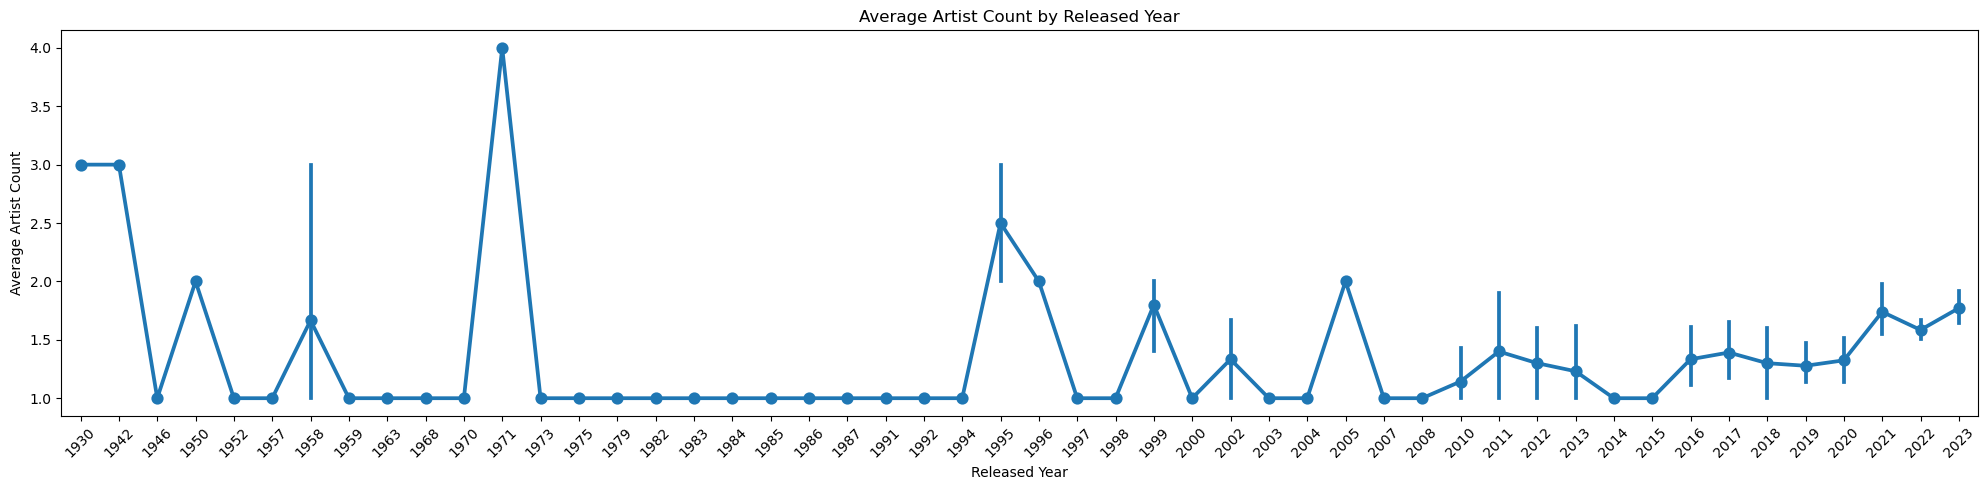

In [10]:
# Define a function to plot data using specified plot type
def plot_data(data, x_col, y_col, title='', xlabel='', ylabel='', figsize=(12, 12)):
    # Create a new figure with the specified size
    plt.figure(figsize=figsize)

    # Create a point plot with mean values
    sns.pointplot(x=x_col, y=y_col, data=data, estimator='mean')
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)  

    # Set the title and axis labels, display the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()  
    plt.show()  

# Plot data
plot_data(spotify_data, 
          x_col='released_year',  
          y_col='artist_count',  
          title='Average Artist Count by Released Year', 
          ylabel='Average Artist Count',  
          xlabel='Released Year',  
          figsize=(20, 5))

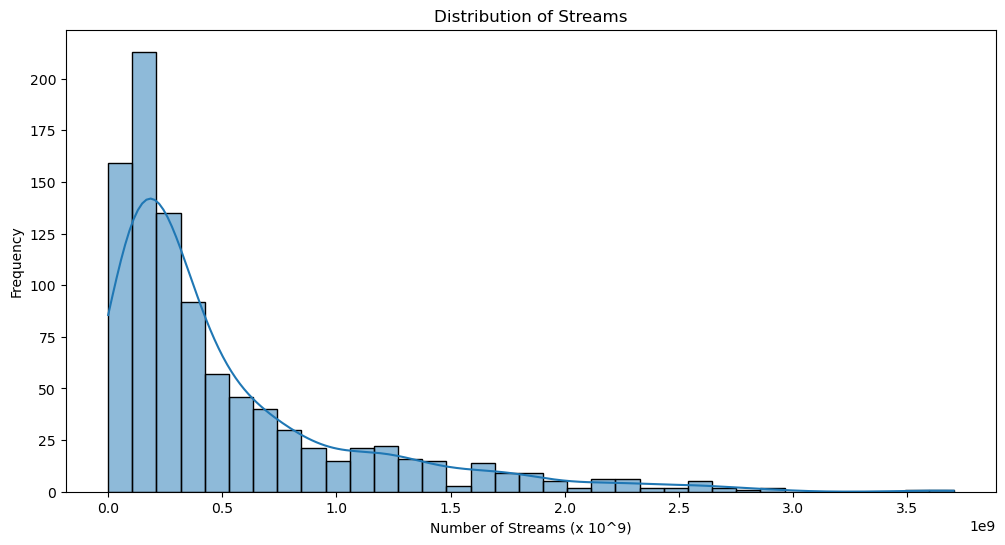

In [11]:
# Distribution plots for the number of 'streams'
plt.figure(figsize=(12, 6))
sns.histplot(spotify_data['streams'], kde=True)
plt.title("Distribution of Streams")
plt.xlabel("Number of Streams (x 10^9)")
plt.ylabel("Frequency")
plt.show()

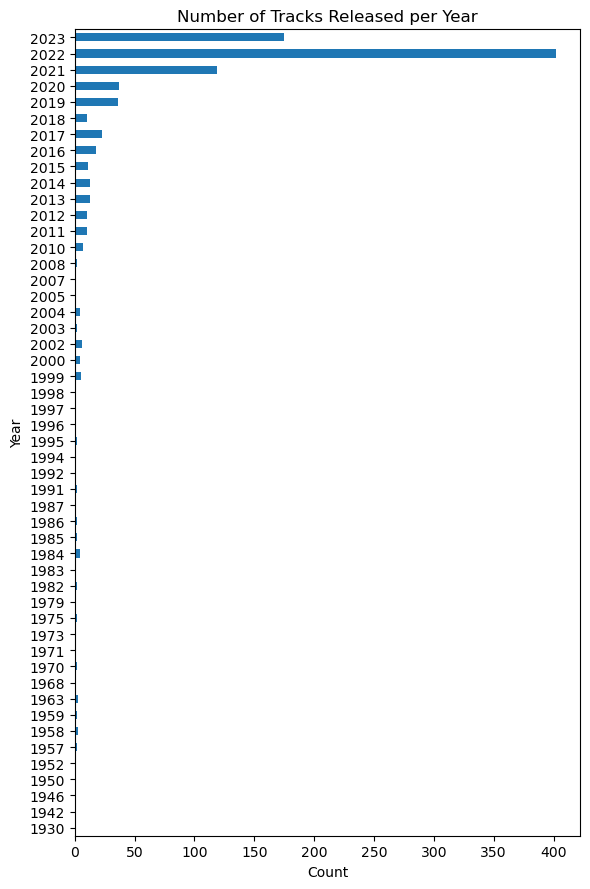

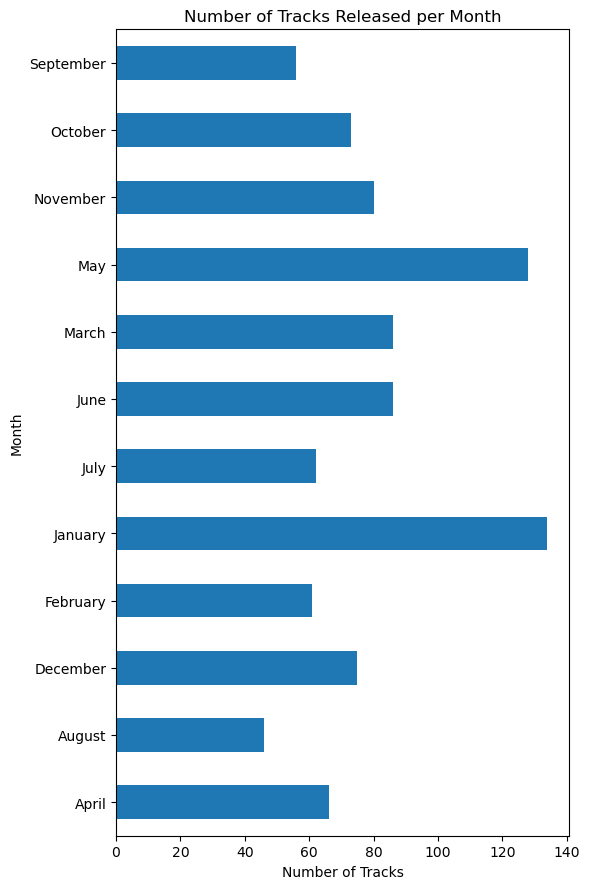

In [12]:
# Define a function to plot data using specified plot type 
def plot_data(data, title='', xlabel='', ylabel='', figsize=(6, 9)):
    # Create a new figure with the specified size
    plt.figure(figsize=figsize)

    # Create a horizontal bar plot using value counts
    data.value_counts().sort_index().plot(kind='barh')
    
    # Set plot title and labels, display the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout() 
    plt.show()
    
# Plot the number of tracks released per year
plot_data(spotify_data['released_year'], 
          title="Number of Tracks Released per Year", 
          xlabel="Count",  
          ylabel="Year")
# Plot the number of tracks released per month
plot_data(spotify_data['released_month'], 
          'Number of Tracks Released per Month', 
          'Number of Tracks', 
          'Month')

#### Basic Descriptive Statistics:

##### Distribution of released_year and artist_count and noticeable trends:
_Most years (between 1930 and 2023) seem to have an artist count that falls between 1 and 2.5 on average, but there are periodic spikes._
* In terms of trends, there are peaks in artist count in the 1950s and 1970s, but collaborations are rare, shown by a low average artist count of around 1, which was prolonged during the late 1980s–2000s. After the early 2000s, there is a _gradual increase in average artist counts, suggesting a rising trend in collaborations_.
* In terms of outliers, the high peaks in the 1950s, early 1970s, and mid-1990s suggest years where specific tracks or albums had unusually high numbers of artists involved. From about 2015 onward, there is a visible upward trend suggesting collaborations become more common in this period.

#### Temporal Trends:
* Recent years show a sharp increase in track releases, with 2023, 2022, and 2021 having the highest counts reflecting digital advancements or better access to recent data.
* Years before 2010, particularly the 1930s to the 1990s, have relatively few releases due to possibly incomplete data or lower production volumes.
* January, May, and December have the highest number of track releases as music releases are often concentrated at the beginning and end of the year, while July and August have fewer releases, likely due to lower audience engagement during summer.

____
#### STEP 4
_Investigate correlations between different variables and provide insights based on the findings. Explore relationships between streams and other musical characteristics like tempo, energy, or playlists._

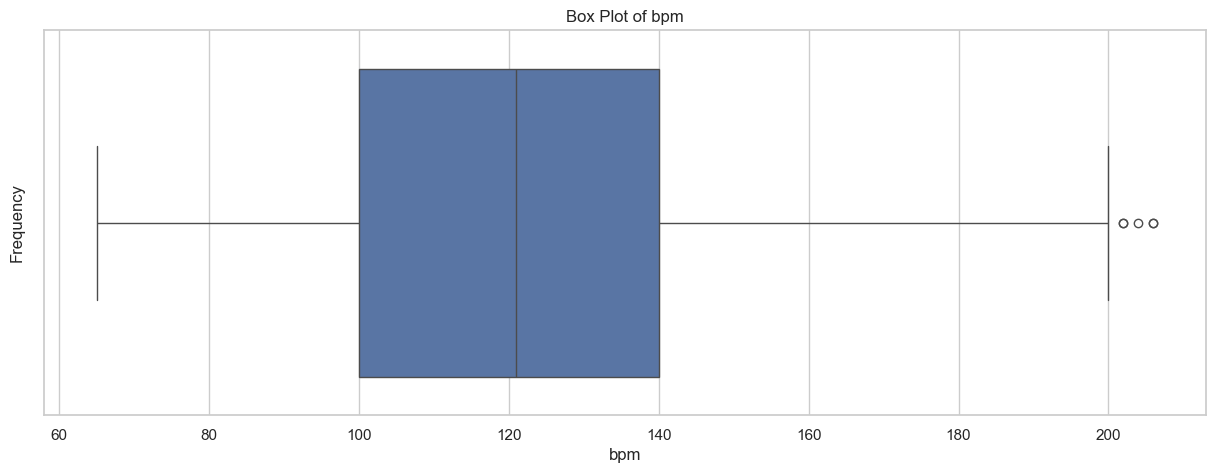

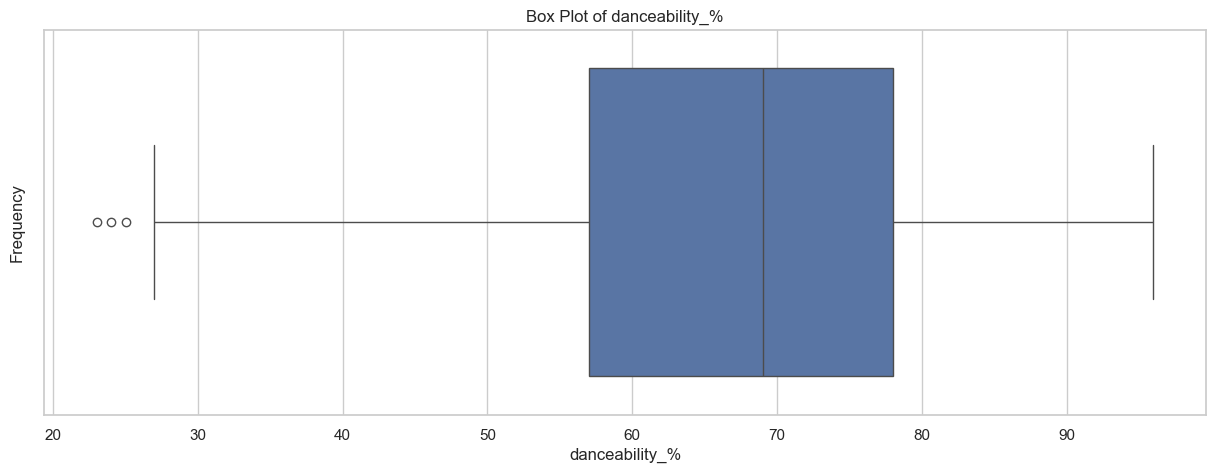

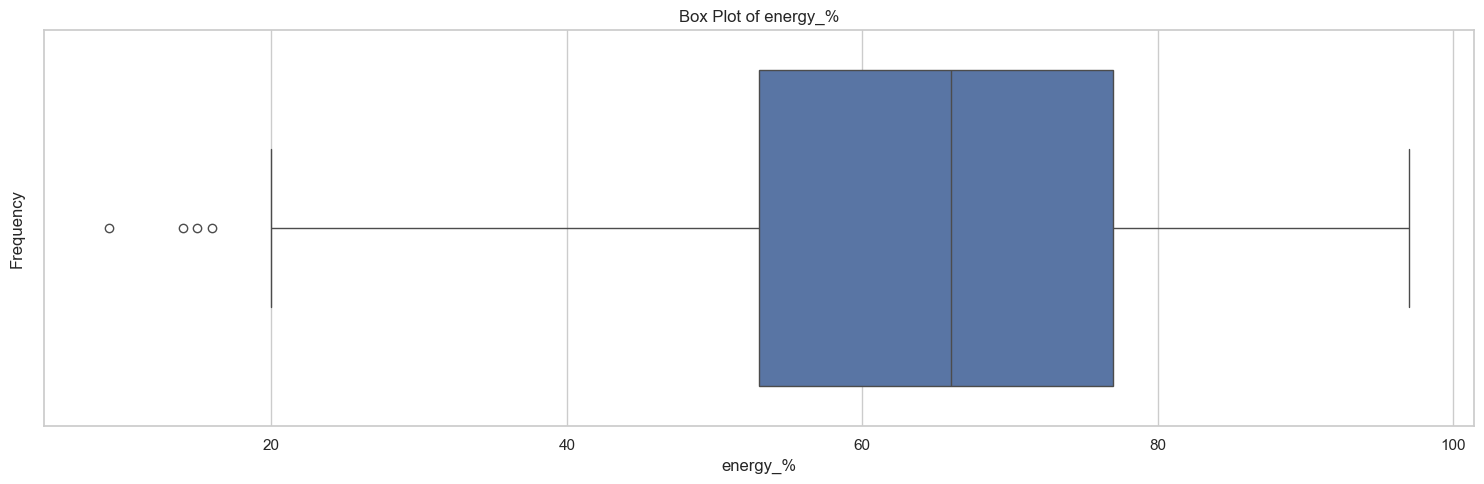

In [13]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Define musical attributes and their corresponding plot types
attributes_info = {'danceability_%', 'bpm','energy_%'}

# Create visualizations for each musical attribute
for attribute in attributes_info:
    plt.figure(figsize=(15, 5))
    
    sns.boxplot(x=spotify_data[attribute])
    plt.title(f'Box Plot of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.savefig(f'visualizations/{attribute}_visualization.png')  
plt.show()  

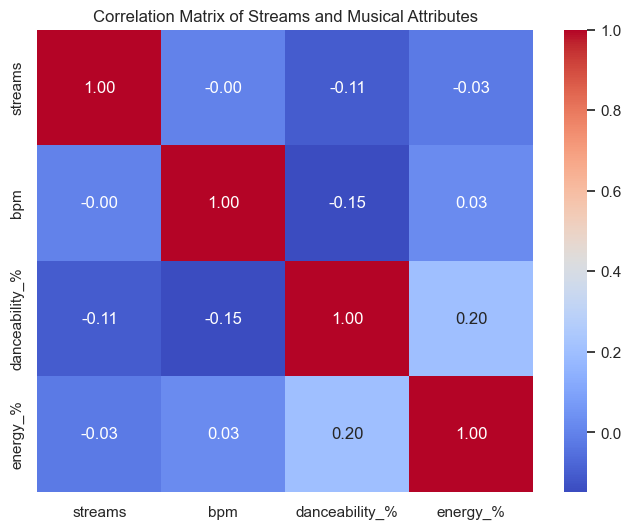

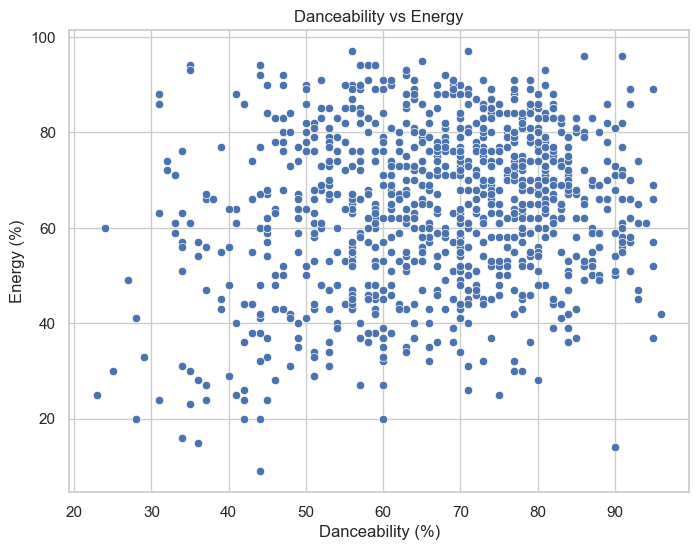

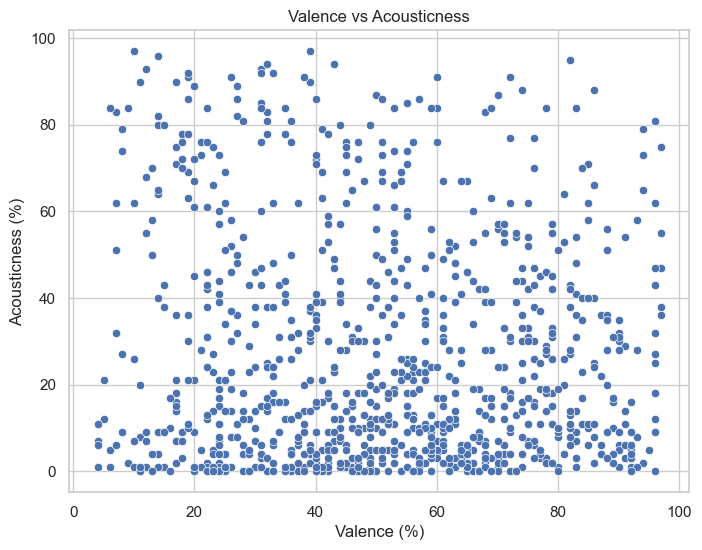

In [14]:
# Musical attributes
# Correlation between 'streams' and musical attributes
correlation_columns = ['streams', 'bpm', 'danceability_%', 'energy_%']
correlation_matrix = spotify_data[correlation_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Streams and Musical Attributes")
plt.show()

# Correlation between danceability_% and energy_%
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_data, x='danceability_%', y='energy_%')
plt.title("Danceability vs Energy")
plt.xlabel("Danceability (%)")
plt.ylabel("Energy (%)")
plt.show()

# Correlation between valence_% and acousticness_%
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_data, x='valence_%', y='acousticness_%')
plt.title("Valence vs Acousticness")
plt.xlabel("Valence (%)")
plt.ylabel("Acousticness (%)")
plt.show()

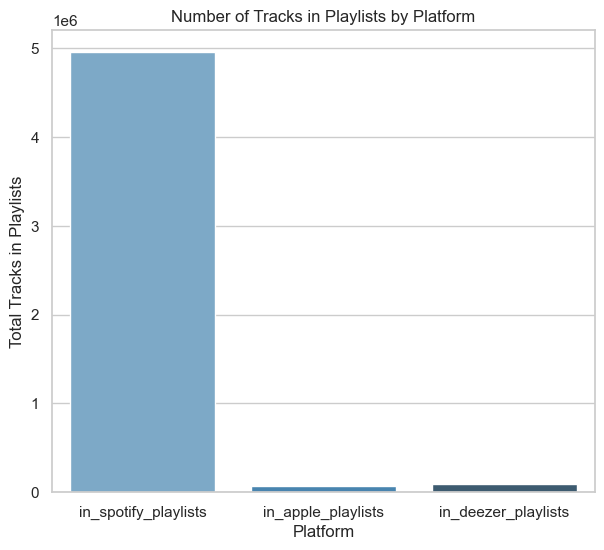

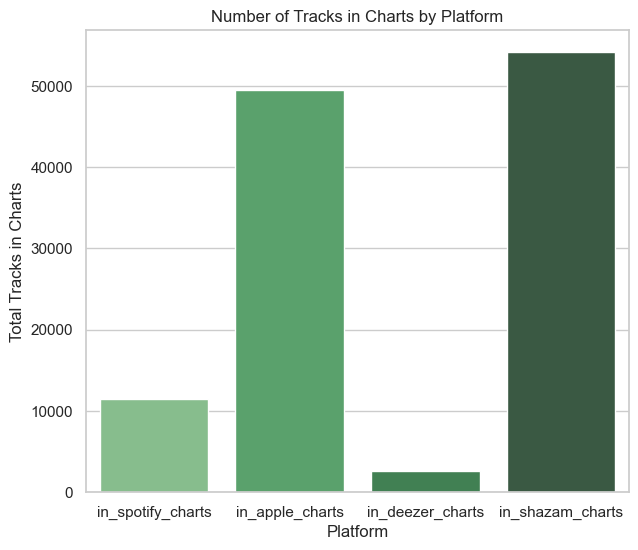

In [15]:
# List of relevant columns for numeric conversion
columns_to_convert = ['in_spotify_playlists',
                    'in_apple_playlists',
                    'in_deezer_playlists',
                    'in_spotify_charts',
                    'in_apple_charts',
                    'in_deezer_charts',
                    'in_shazam_charts']

# Convert relevant columns to numeric in case of non-numeric values
spotify_data[columns_to_convert] = spotify_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Sum the track counts for playlists and charts
playlist_counts = spotify_data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum()
chart_counts = spotify_data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].sum()

# Function to plot bar graphs
def plot_bar(data, title, xlabel, ylabel, palette):
    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({'Platform': data.index, 'Total': data.values})
    
    plt.figure(figsize=(7, 6))
    sns.barplot(x='Platform', y='Total', hue='Platform', data=plot_data, palette=palette, legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plotting the number of tracks in playlists by platform
plot_bar(playlist_counts, 
          "Number of Tracks in Playlists by Platform", 
          "Platform", 
          "Total Tracks in Playlists", 
          "Blues_d")

# Plotting the number of tracks in charts by platform
plot_bar(chart_counts, 
          "Number of Tracks in Charts by Platform", 
          "Platform", 
          "Total Tracks in Charts", 
          "Greens_d")

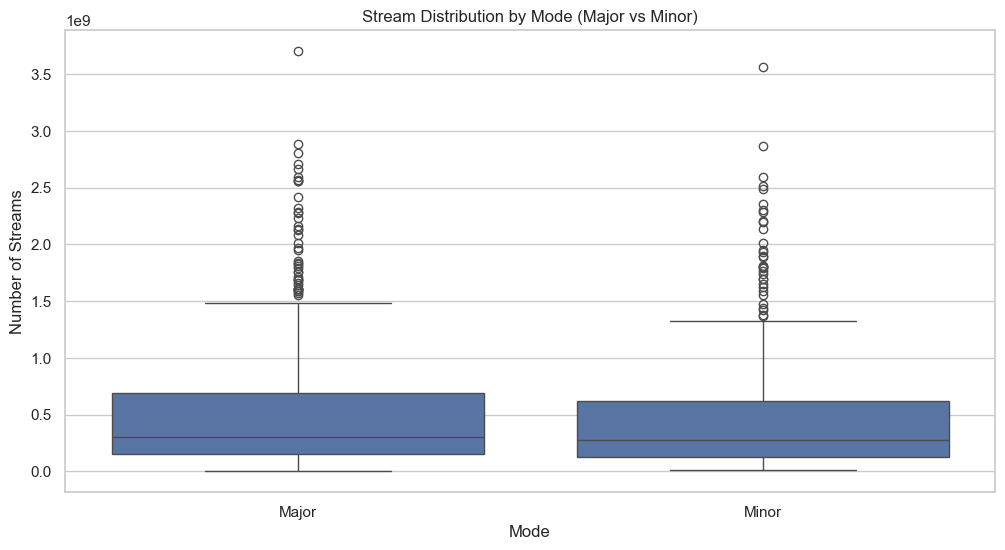

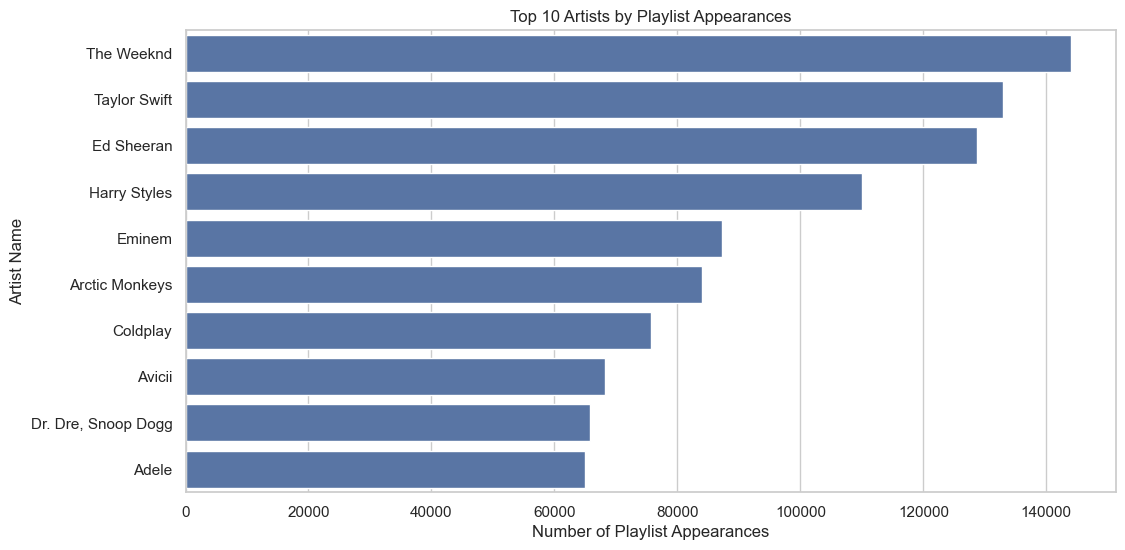

In [16]:
# 1. Patterns among tracks with same key/mode
plt.figure(figsize=(12, 6))
sns.boxplot(x='mode', y='streams', data=spotify_data)
plt.title('Stream Distribution by Mode (Major vs Minor)')
plt.xlabel('Mode')
plt.ylabel('Number of Streams')
plt.show()

# 2. Most frequently appearing artists in playlists
# First, get the top 10 artists by playlist appearances
top_artists = spotify_data.groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Playlist Appearances')
plt.xlabel('Number of Playlist Appearances')
plt.ylabel('Artist Name')
plt.show()


#### Genre and Music Characteristics:

* ##### Correlation between streams and musical attributes
    * None of the musical attributes have a strong correlation with streams, with the highest correlation with streams being danceability (-0.11).

* ##### Correlation between each attribute
    * danceability_% and energy_%
        * There is a moderate positive relationship, suggesting that tracks with higher danceability tend to have higher energy. 
    * valence_% and acousticness_%
        * There is a very weak correlation between these two, suggesting that acousticness and valence are independent of each other.


#### Platform Popularity:

* ##### Comparison of Tracks on Platforms
    * Spotify has significantly more tracks in playlists than Apple or Deezer.

* ##### Platform Favoring Popular Tracks
    * Apple and Shazam have a higher count of tracks compared to Spotify and Deezer, suggesting that they tend to feature more unique tracks in their charts.


#### Advanced Analysis:

* ##### Patterns among tracks with the same key or mod
    * The similarity in stream distribution between Major and Minor modes implies that the key of a track does not have a strong impact on streaming numbers.
* ##### Most frequently appearing artists in playlists or charts
    * Artists who are particularly mainstream and versatile, like The Weeknd, Taylor Swift, and Ed Sheeran, appear more frequently in playlists, which suggests a preference for well-known, genre-diverse artists who attract wide audiences.

- - - - - 

______________________
### Summary (Answers to Guide Questions)

#### | Overview of Dataset:

* ##### Initial Exploration:
    * _The dataset has 953 rows containing unique values of observation and 24 columns of each of the observations' categories/traits/attributes._ 

* ##### Dataset Features:
    * _Containing 24 columns, the dataset has three distinct data types which are:_
        * Integer (int): The most amount of data type used by 18 columns, such as 'artist_count' and 'released_year' that contain dates, counts, or any quantifiable traits.
        * Decimal (float): The data type used by only the 'in_shazam_charts' which uses values with decimal places.
        * Text (object): Used by columns like 'artist(s)_name' and 'mode', this data type is used by 5 columns that contain strings of characters or texts.

* ##### Issues in Dataset:
    * There are 145 values missing in the dataset.
        * 50 values missing in 'in_shazam_charts'.
        * 95 values missing in 'key'.
    * Index 575, with 'track_name' "Love Grows (Where My Rosemary Goes)", has its 'streams' value in long alphanumeric characters, resulting in the whole column being identified as a text column.
 
#### | Basic Descriptive Statistics:

* ##### Mean, median, and standard deviation of the streams column:
    * Mean = 5.141374e+08
    * Median = 2.905309e+08
    * Standard Deviation = 5.668569e+0e08

* ##### Distribution of released_year and artist_count and noticeable trends:
    * _Most years (between 1930 and 2023) seem to have an artist count that falls between 1 and 2.5 on average, but there are periodic spikes._
        * Trends: There are peaks in artist count in the 1950s and 1970s, but collaborations are rare, shown by a low average artist count of around 1, which was prolonged during the late 1980s–2000s. After the early 2000s, there is a _gradual increase in average artist counts, suggesting a rising trend in collaborations_.
        * Outliers: The high peaks in the 1950s, early 1970s, and mid-1990s suggest years where specific tracks or albums had unusually high numbers of artists involved. From about 2015 onward, there is a visible upward trend suggesting collaborations become more common in this period.

#### | Top Performers:

* ##### Top 5 most streamed tracks:
    1. Blinding Lights
    2. Shape of You
    3. Someone You Loved
    4. Dance Monkey
    5. Sunflower - Spider-Man: Into the Spider-Verse	

* ##### Top 5 Most Frequent Artists by Number of Tracks:
    1. Taylor Swift
    2. The Weeknd
    3. Bad Bunny
    4. SZA
    5. Harry Styles	

#### | Temporal Trends:
* ##### Recent years show a sharp increase in track releases, with 2023, 2022, and 2021 having the highest counts reflecting digital advancements or better access to recent data.
* ##### Years before 2010, particularly the 1930s to the 1990s, have relatively few releases due to possibly incomplete data or lower production volumes.
* ##### January, May, and December have the highest number of track releases as music releases are often concentrated at the beginning and end of the year, while July and August have fewer releases, likely due to lower audience engagement during summer.

#### | Genre and Music Characteristics:

* ##### Correlation between streams and musical attributes
    * None of the musical attributes have a strong correlation with streams, with the highest correlation with streams being danceability (-0.11).

* ##### Correlation between each attribute
    * danceability_% and energy_%
        * There is a moderate positive relationship, suggesting that tracks with higher danceability tend to have higher energy. 
    * valence_% and acousticness_%
        * There is a very weak correlation between these two, suggesting that acousticness and valence are independent of each other.


#### | Platform Popularity:

* ##### Comparison of Tracks on Platforms
    * Spotify has significantly more tracks in playlists than Apple or Deezer.

* ##### Platform Favoring Popular Tracks
    * Apple and Shazam have a higher count of tracks compared to Spotify and Deezer, suggesting that they tend to feature more unique tracks in their charts.


#### | Advanced Analysis:

* ##### Patterns among tracks with the same key or mod
    * The similarity in stream distribution between Major and Minor modes implies that the key of a track does not have a strong impact on streaming numbers.
* ##### Most frequently appearing artists in playlists or charts
    * Artists who are particularly mainstream and versatile, like The Weeknd, Taylor Swift, and Ed Sheeran, appear more frequently in playlists, which suggests a preference for well-known, genre-diverse artists who attract wide audiences.